# Homework 2 (Dev Mody)
## Exercise 2: Slow-crawling behavior of gradient descent

In this exercise we will compare the standard and fully normalized gradient descent schemes in minimizing the function
$$g(w_1, w_2) = \tanh (4w_1 + 4_w2) + \max \{1, 0.4w_1^2\} + 1$$
The fully normalized gradient descent can be for instance implemented using:
$$w^k = w^{k - 1} - \frac{\alpha}{||{\nabla g(w^{k - 1})}||_2 + \epsilon} \times \nabla g(w^{k - 1})$$
Using an initial vector $w^0 = (2, 2)$ make a run of 1000 steps of standard gradient descent as well as with Fully Normalized Gradient Descent. In both cases, use a step length of $\alpha = 0.1$. Plot the cost function history for both runs and comment on the progress made with each approach. Comment on your observations:

ANSWER: The implementations for Standard Gradient Descent + Fully Normalized Gradient Descent + Experiment is as follows:


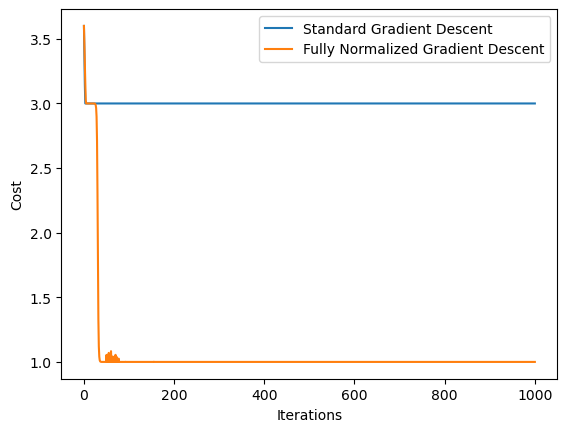

In [2]:
from autograd import grad, value_and_grad
import autograd.numpy as np
import sys
sys.path.append('homeworks/homework2/MLRPlotting')
import matplotlib.pyplot as plt
from MLRPlotting import static_plotter

def standard_gradient_descent (g, alpha, max_its, w):
    gradient = grad(g)
    weight_history = [w]
    cost_history = [g(w)]
    for _ in range(max_its):
        eval_grad = gradient(w)
        w = w - alpha*eval_grad
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history,cost_history

def fully_normalized_gradient_descent (g, alpha, max_its, w):
    epsilon = 1e-11
    gradient = value_and_grad(g)
    weight_history = [w] 
    cost_history = [g(w)] 

    for _ in range(max_its):
        _,grad = gradient(w)
        norm = np.linalg.norm(grad)
        w = w - ((alpha/(norm+epsilon))*(grad))
        weight_history.append(w)
        cost_history.append(g(w))  
    return weight_history,cost_history

static_plotter = static_plotter.Visualizer()
g = lambda w : np.tanh(4*w[0]+4*w[1])+max(1,0.4*(w[0]**2))+1
w = np.array([2.0,2.0])
max_its = 1000
alpha = 0.1

weight_history_standard, cost_history_standard = standard_gradient_descent(g, alpha, max_its, w)
weight_history_normalized, cost_history_normalized = fully_normalized_gradient_descent(g, alpha, max_its, w)

# Chose to use Matplotlib to visualize because the cost_history_plot looks weird
plt.plot(cost_history_standard, label="Standard Gradient Descent")
plt.plot(cost_history_normalized, label="Fully Normalized Gradient Descent")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend()
plt.show()

From the cost function plot:  

1. **Standard Gradient Descent (SGD)** (blue line):  
   - Doesn't really converge.
   - The cost stagnates at a higher value, indicating the algorithm struggles to make significant progress.
  
2. **Fully Normalized Gradient Descent (FNGD)** (orange line):  
   - Rapidly decreases the cost in the early iterations.
   - Converges to a much lower cost compared to standard gradient descent.
   - Exhibits slight oscillations before stabilizing.

The results demonstrate that **Fully Normalized Gradient Descent significantly outperforms Standard Gradient Descent** for this function. The normalization term $||\nabla g(w)||_2$ ensures that updates are **scale-invariant**, allowing Fully Normalized Gradient Descent to take more adaptive steps while avoiding excessive movements. This leads to **faster and more stable convergence**.

